<a href="https://colab.research.google.com/github/brian-ho/intro-to-urban-data/blob/main/Measure/M03_Reading_and_writing_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **03 Measure** Reading and writing files

```
    Class       ARCH 6131 Urban Design Methods / Skills / Tools 1
                The Gensler Family AAP NYC Center
                Fall 2023
                Monday 3:30 PM to 6 PM

    Instructor  Brian Ho
                brian@brian-ho.io
```

This notebook covers a bunch of ways to read and write flies. It assumes you've understood the first two notebooks. In particular, how we load in external libraries and packages, and the basics of data structures and functions.

This notebook explains how to read and write:

- Comma-separated value (CSV) files for tabular data
- GeoJSON for more web-based geospatial data
- Shapefiles (SHP) for more GIS geospatial data
- Image files

⚠ **Reminder about saving files on Colab notebooks**

_Please keep in mind that any files you create in a Colab notebook are **temporarily** stored on the cloud. You must download these files to save them, or write them directly into your Drive._


This notebook relies on a few libraries, so we will import them now:

In [1]:
import os
import json
import pandas as pd
import geopandas as gpd
import PIL
from pathlib import Path

Finally, you'll need the example data located [here](https://github.com/brian-ho/intro-to-urban-data/tree/main/Measure/Example%20Data) on GitHub. Upload this to someplace in Google Drive, and update the variable accordingly with the right path.

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
EXAMPLE_DATA_DIRECTORY = (
    "/content/drive/MyDrive/Cornell AAP - MSAUD/ARCH 6131/Example Data"
)

## CSV files
Comma-separated values files contain tabular or two-dimensional data. You can think of them as basic spreadsheets or tables — just the numbers and values, without formulas or formatting. The data is organized into rows and columns, with the first row typically serving as column headers.

Here's data the you might expect to store in a CSV

| first_column | second_column | third_column |
| --- | --- | --- |
| 1 | A | B |
| 2 | C | D |
| 3 | E | F |

CSVs get their name because they are in fact written out as plain text files. Rows are each a line, and the columns are separated by ... commas! So the above would look something like:

```
first_column,second_column,third_column
1,A,B
2,C,D
3,E,F
```


You can load any CSV using `pandas` and the helpful `read_csv` function:

In [4]:
# Reads a CSV file on Google Drive
example_dataframe = pd.read_csv(Path(EXAMPLE_DATA_DIRECTORY) / "example.csv")
example_dataframe

,first_column,second_column,thid_column
0,1,2,3
1,A,C,E
2,B,D,F


`example_dataframe` is now a variable that has an assigned value of a `pandas` table, or `DataFrame`.

In the future, you'll be able to edit and work with this data in Python. For now, we'll skip right to writing. You can create a CSV file from this data with the equally helpful `to_csv` method.

This time, you need to call this from the `DataFrame` itself. The first argument is the file name and path.

In [5]:
# This create a temporary file on the cloud computer runnin your Colab notebook
example_dataframe.to_csv("saved_example.csv", index=False)

In [6]:
# Or, you can write directly to your Google Drive using a path under "/context/drive/..."
example_dataframe.to_csv("/content/drive/MyDrive/saved_example.csv", index=False)

And in the future, you can create dataframe and write them out in the same way:

In [7]:
# This is but one of many ways to make a Pandas DataFrame
created_dataframe = pd.DataFrame(
    {
        "first_column": [1, "A", "B"],
        "second_column": [2, "C", "D"],
        "thid_column": [3, "E", "F"],
    }
)
created_dataframe.to_csv("another_example.csv", index=False)

The great thing about `Pandas` is you can also open and save a bunch of other common tabular data formats. There's a long list [here](https://pandas.pydata.org/docs/reference/io.html) but this includes Excel, JSON, and other delimitted file types.

## GeoJSON files
Geospatial information you find online will often be stored as [GeoJSON files](https://geojson.org/). These can contain lots of deeper data, or they can simply be a collection of basic shapes.

GeoJSON files are by definition geo-referenced, and they will almost always use the [WGS 84 map projection](https://earth-info.nga.mil/index.php?dir=wgs84&action=wgs84): the coordinates of geometry will be in longitude-latitude decimal degrees pairs.

`GeoPandas` makes loading GeoJSONs very easy!

In [8]:
# Let's view a sample GeoJSON with PLUTO data for NYC
example_geodata = gpd.read_file(Path(EXAMPLE_DATA_DIRECTORY) / "pluto.geojson")
example_geodata

,address,bbl,geometry
0,225 LIBERTY STREET,1000160125,"MULTIPOLYGON (((-74.01554 40.71338, -74.01550 ..."
1,25 ANN STREET,1000907502,"MULTIPOLYGON (((-74.00747 40.71085, -74.00729 ..."
2,146 CHAMBERS STREET,1001377504,"MULTIPOLYGON (((-74.00974 40.71565, -74.00988 ..."
3,102 BROAD STREET,1000080044,"MULTIPOLYGON (((-74.01206 40.70293, -74.01212 ..."
4,401 SOUTH END AVENUE,1000160003,"MULTIPOLYGON (((-74.01322 40.71833, -74.01319 ..."
...,...,...,...
9130,81 BROADWAY,3024700020,"MULTIPOLYGON (((-73.96571 40.71078, -73.96564 ..."
9131,103 BROADWAY,3024710008,"MULTIPOLYGON (((-73.96482 40.71073, -73.96473 ..."
9132,113 BROADWAY,3024710013,"MULTIPOLYGON (((-73.96438 40.71058, -73.96413 ..."
9133,53 BROADWAY,3024707501,"MULTIPOLYGON (((-73.96558 40.71100, -73.96568 ..."


Hmmm ... notice this produces a table. It's a useful preview of the organization of the data, but we want a map!

You can get one with `GeoDataFrame.plot()`.

<Axes: >

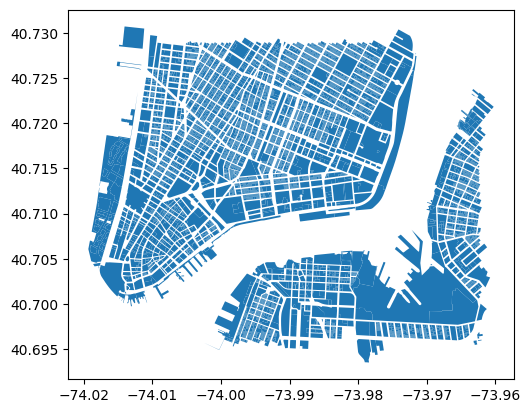

In [9]:
# Let's take a peek
example_geodata.plot()

Much like with `Pandas` and writing CSV files, you can write GeoJSON files using `GeoPandas` natively.

You do this with the `GeoDataFrame.to_file()` method, and you must provide a `driver` argument that specifies GeoJSON as the desired format.

In [10]:
# This puts a GeoJSON file on your Colab notebook runtime
example_geodata.to_file("some_geojson.geojson", driver="GeoJSON")

## SHP files
You can also read and write shapefiles, typically used for desktop GIS software, with `GeoPandas`. Shapefiles are usually zipflies (ZIP) or a folder containing multiple other files.

You can open the ZIP file or the folder.

<Axes: >

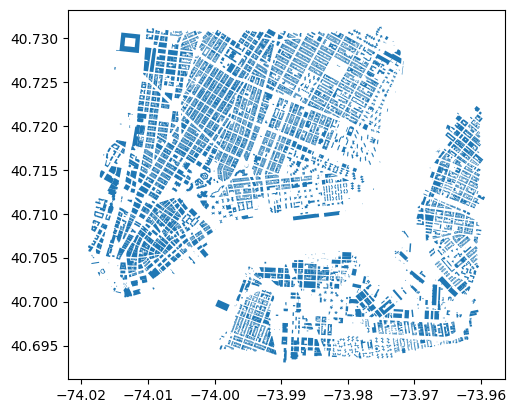

In [11]:
# Open a folder for the shapefile
buildings_geodata = gpd.read_file(Path(EXAMPLE_DATA_DIRECTORY) / "buildings")
buildings_geodata.plot()

... and you can write to shapefile. Note this actually produces multiple discrete files which constitute the "shapefile".

In [13]:
# The default output format is shapefile
# You can also specify driver='ESRI Shapefile'
buildings_geodata.to_file("example_buiding_shapefile")


In general, GeoJSONs tend to be simpler to work with and are much more common for web-based mappnig and technology applications — we'll use those in the class for those reasons. But hopefully `geopandas` can replace some of your need for GIS software.

## Image files
Image files can be opened with `PIL`, another Python library.

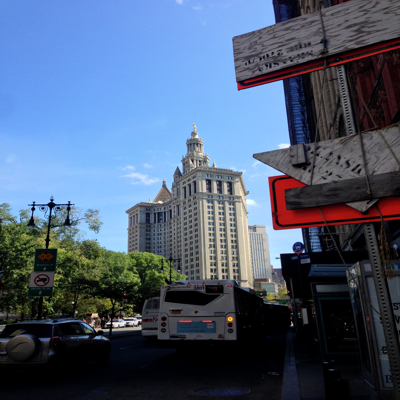

In [14]:
# We can open most supported images directly
img = PIL.Image.open(Path(EXAMPLE_DATA_DIRECTORY) / "IMG_3045.JPG")

# JPEG files may be rotated. We can use metadata to orient them correctly!
img = PIL.ImageOps.exif_transpose(img)
img.resize((400, 400))

Note that iPhones (and other cameras) may use the [HEIC](https://en.wikipedia.org/wiki/High_Efficiency_Image_File_Format) file format. Opening these with `PIL` requires another library, `pillow-heif`.

In [15]:
!pip install pillow-heif --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.3 MB/s eta 0:00:00


In [16]:
from pillow_heif import register_heif_opener

# This helps us open HEIC files. You just need to run it once.
register_heif_opener()

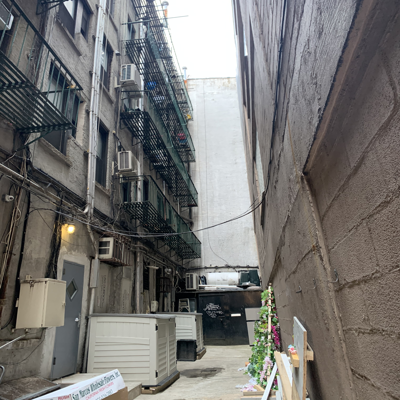

In [17]:
# Opening a HEIC photo
img = PIL.Image.open(Path(EXAMPLE_DATA_DIRECTORY) / "IMG_1605.HEIC")
img.resize((400, 400))

Saving image files is also possible! We can explore ways to create image files through Python in this class.

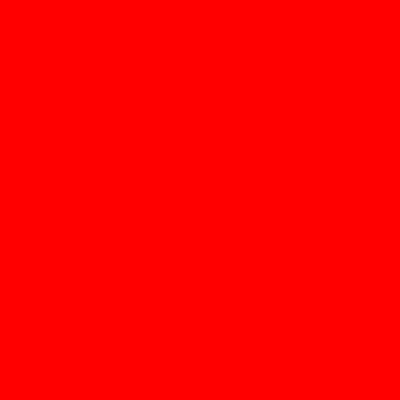

In [18]:
# This creates a not-very-exciting new image
example_img = PIL.Image.new(mode="RGB", size=(400, 400), color=(255, 0, 0))
example_img

In [19]:
# You can save it to a number of formats
example_img.save("a_red_square.png")